In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the data

In [177]:
input_data = pd.read_csv('annotated_points_np_53.csv')

In [178]:
input_data

,x,y,labels
0,1.867572,28.294304,1
1,1.485569,22.710911,1
2,7.597623,25.042438,1
3,4.626486,17.618366,1
4,7.894737,23.815319,1
5,11.120543,26.085489,1
6,8.022071,18.477349,1
7,4.966044,10.562430,1
8,3.013582,4.365477,1
9,6.366723,6.206156,1


# Plotting the input data

In [179]:
input_data['labels'] = [1 if i==1 else -1 for i in input_data['labels']]

In [180]:
# Class-1
class_1 = input_data[input_data['labels']==1]

In [181]:
# Class-2
class_2 = input_data[input_data['labels']==-1]

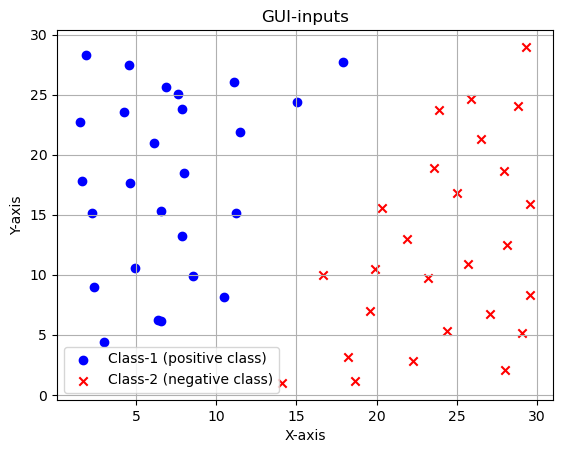

In [182]:
plt.scatter(class_1['x'],class_1['y'],marker='o',color='blue',label='Class-1 (positive class)')
plt.scatter(class_2['x'],class_2['y'],marker='x',color='red',label='Class-2 (negative class)')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('GUI-inputs')
plt.legend()
plt.grid(True)

plt.show()

# Perceptron Model

In [183]:
def perceptron_model(x,y,w_0=np.array([0,0,0]), T=1000): # w_0 is the initial weight vector
    w_t = w_0
    N = len(x)
    for t in range(1,T+1):
        for i in range(0,N):
            dot_prd = np.dot(w_t,x[i])
            # print(dot_prd)
            if y[i]*(dot_prd)<0:
                w_t = w_t + y[i]*x[i]
            # end-if
        # end-for
    # end-for
    
    return w_t

## Implementation with w_0 = zero vector

In [184]:
N = len(input_data)
dataset = [np.array([input_data.loc[i]['x'],input_data.loc[i]['y'],1]) for i in range(N)]
labels = [input_data.loc[i]['labels'] for i in range(N)]

In [185]:
final_weight_vector = perceptron_model(dataset,labels)

In [186]:
final_weight_vector

array([0, 0, 0])

In [187]:
w_1, w_2, b = final_weight_vector

In [188]:
x1 = np.linspace(0, 30, 100)  # Generate 100 points from 0 to 30
slope = -w_1/w_2
bias = -b/w_2
y1 = slope*x1 + bias

/tmp/ipykernel_4358/335163411.py:2: RuntimeWarning: invalid value encountered in scalar divide
  slope = -w_1/w_2
/tmp/ipykernel_4358/335163411.py:3: RuntimeWarning: invalid value encountered in scalar divide
  bias = -b/w_2


Line with respect to the final-weight-vector: y = nanx + nan


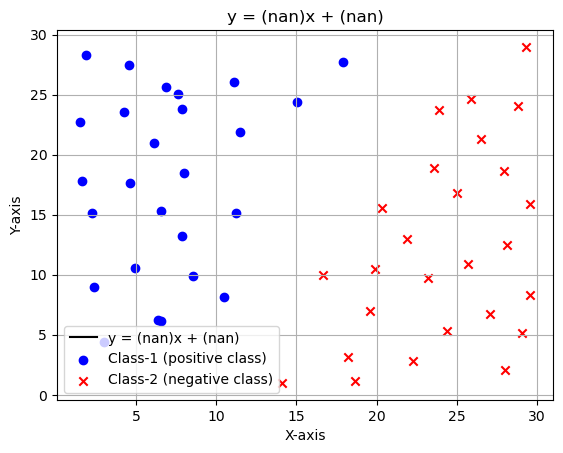

In [192]:
print(f'Line with respect to the final-weight-vector: y = {slope}x + {bias}')
plt.plot(x1, y1, label=f'y = ({slope:.2f})x + ({bias:.2f})', color='black')
plt.scatter(class_1['x'],class_1['y'],marker='o',color='blue',label='Class-1 (positive class)')
plt.scatter(class_2['x'],class_2['y'],marker='x',color='red',label='Class-2 (negative class)')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'y = ({slope:.2f})x + ({bias:.2f})')
plt.legend()
plt.grid(True)

plt.show()

Since initial weight vector is zero, we did not received any updated weight vector as the final_weight_vector. Hence we can't find any line that classifies the two classes.

## Implementation with w_0 as any one datapoint from the dataset

In [193]:
N = len(input_data)
dataset = [np.array([input_data.loc[i]['x'],input_data.loc[i]['y'],1]) for i in range(N)]
labels = [input_data.loc[i]['labels'] for i in range(N)]

In [194]:
final_weight_vector = perceptron_model(dataset,labels,dataset[0])

In [195]:
final_weight_vector

array([-56.4516129 ,  47.90367113, 205.        ])

In [196]:
w_1, w_2, b = final_weight_vector

In [197]:
x1 = np.linspace(0, 30, 100)  # Generate 100 points from 0 to 30
slope = -w_1/w_2
bias = -b/w_2
y1 = slope*x1 + bias

Line with respect to the final-weight-vector: y = 1.1784402232482563x + -4.279421496424372


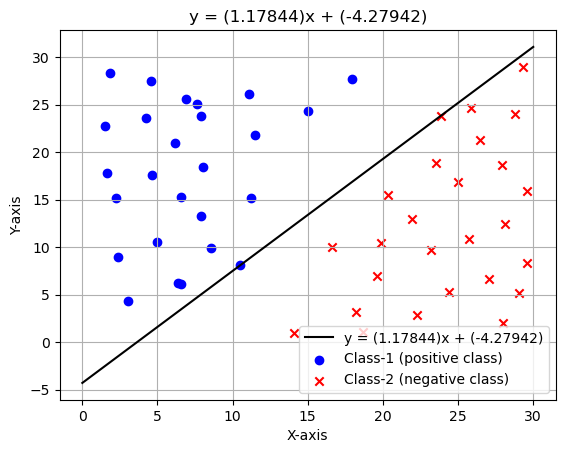

In [199]:
print(f'Line with respect to the final-weight-vector: y = {slope}x + {bias}')
plt.plot(x1, y1, label=f'y = ({slope:.5f})x + ({bias:.5f})', color='black')
plt.scatter(class_1['x'],class_1['y'],marker='o',color='blue',label='Class-1 (positive class)')
plt.scatter(class_2['x'],class_2['y'],marker='x',color='red',label='Class-2 (negative class)')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'y = ({slope:.5f})x + ({bias:.5f})')
plt.legend()
plt.grid(True)

plt.show()

## Implementation with w_0 as any random vector

In [200]:
N = len(input_data)
dataset = [np.array([input_data.loc[i]['x'],input_data.loc[i]['y'],1]) for i in range(N)]
labels = [input_data.loc[i]['labels'] for i in range(N)]

In [201]:
random_vector = np.random.rand(1,3)
random_vector

array([[0.07228269, 0.68889242, 0.76400889]])

In [202]:
final_weight_vector = perceptron_model(dataset,labels,random_vector[0])

In [203]:
final_weight_vector

array([-60.96337096,  51.70944667, 217.76400889])

In [204]:
w_1, w_2, b = final_weight_vector

In [205]:
x1 = np.linspace(0, 30, 100)  # Generate 100 points from 0 to 30
slope = -w_1/w_2
bias = -b/w_2
y1 = slope*x1 + bias

Line with respect to the final-weight-vector: y = 1.1789600332409957x + -4.211300311867987


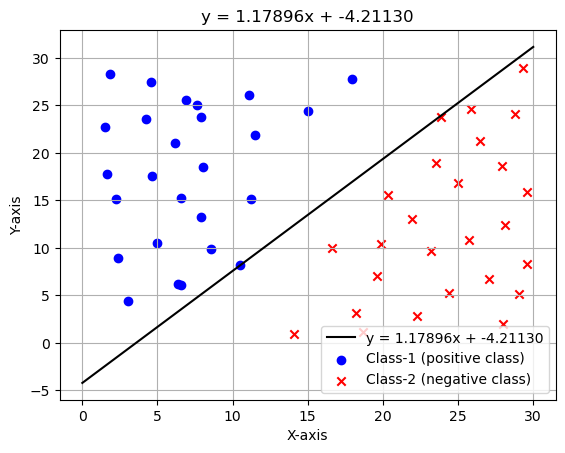

In [206]:
print(f'Line with respect to the final-weight-vector: y = {slope}x + {bias}')
plt.plot(x1, y1, label=f'y = {slope:.5f}x + {bias:.5f}', color='black')
plt.scatter(class_1['x'],class_1['y'],marker='o',color='blue',label='Class-1 (positive class)')
plt.scatter(class_2['x'],class_2['y'],marker='x',color='red',label='Class-2 (negative class)')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f'y = {slope:.5f}x + {bias:.5f}')
plt.legend()
plt.grid(True)

plt.show()